In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -q bank-additional.zip

df_bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=";")

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
df_bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data = df_bank.sample(frac=0.9, random_state=786)
data_unseen = df_bank.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (37069, 21)
Unseen Data For Predictions: (4119, 21)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'y', session_id=123) 

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(37069, 21)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='y',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9191,0.9496,0.5587,0.6564,0.6030,0.5583,0.5609,0.386
gbc,Gradient Boosting Classifier,0.9181,0.9469,0.5289,0.6598,0.5868,0.5420,0.5462,2.942
rf,Random Forest Classifier,0.9132,0.9401,0.4452,0.6558,0.5302,0.4843,0.4954,1.922
lr,Logistic Regression,0.9116,0.9330,0.4116,0.6577,0.5057,0.4600,0.4756,2.605
ada,Ada Boost Classifier,0.9105,0.9385,0.4010,0.6512,0.4956,0.4496,0.4659,0.828
lda,Linear Discriminant Analysis,0.9105,0.9352,0.5124,0.6119,0.5573,0.5080,0.5107,0.281
ridge,Ridge Classifier,0.9089,0.0000,0.3282,0.6792,0.4420,0.3989,0.4306,0.045
knn,K Neighbors Classifier,0.9068,0.8721,0.4865,0.5933,0.5344,0.4832,0.4863,0.981
et,Extra Trees Classifier,0.9027,0.9160,0.3503,0.6006,0.4420,0.3927,0.4102,2.152
dt,Decision Tree Classifier,0.8902,0.7296,0.5237,0.5014,0.5121,0.4503,0.4505,0.256


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8898,0.7397,0.5474,0.4984,0.5217,0.4596,0.4603
1,0.8979,0.7319,0.5193,0.5362,0.5276,0.4704,0.4705
2,0.8909,0.7296,0.5228,0.5034,0.5129,0.4515,0.4516
3,0.8952,0.7420,0.5455,0.5235,0.5342,0.4752,0.4753
4,0.8805,0.7092,0.4895,0.4605,0.4746,0.4073,0.4075
5,0.8879,0.7210,0.5070,0.4915,0.4991,0.4360,0.4361
6,0.8906,0.7287,0.5210,0.5034,0.5120,0.4504,0.4505
7,0.8886,0.7260,0.5175,0.4950,0.5060,0.4433,0.4434
8,0.8882,0.7327,0.5333,0.4919,0.5118,0.4488,0.4492


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9044,0.8752,0.4807,0.5781,0.5249,0.4723,0.4748
1,0.9106,0.8999,0.5123,0.6109,0.5573,0.5080,0.5104
2,0.9006,0.8623,0.4526,0.5584,0.5000,0.4455,0.4485
3,0.9052,0.8690,0.4860,0.5840,0.5305,0.4783,0.4808
4,0.9083,0.8757,0.5140,0.5976,0.5526,0.5019,0.5036
5,0.9056,0.8589,0.4510,0.5945,0.5129,0.4617,0.4671
6,0.9114,0.8738,0.5210,0.6157,0.5644,0.5154,0.5177
7,0.9091,0.8784,0.4755,0.6126,0.5354,0.4859,0.4907
8,0.9067,0.8705,0.4702,0.5956,0.5255,0.4746,0.4786


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9137,0.9263,0.4281,0.6667,0.5214,0.4764,0.4905
1,0.9148,0.9390,0.4000,0.6951,0.5078,0.4649,0.4862
2,0.9118,0.9272,0.4246,0.6505,0.5138,0.4676,0.4805
3,0.9114,0.9396,0.4371,0.6443,0.5208,0.4740,0.4848
4,0.9137,0.9350,0.4406,0.6632,0.5294,0.4840,0.4963
5,0.9040,0.9225,0.3741,0.6045,0.4622,0.4127,0.4271
6,0.9056,0.9396,0.3811,0.6158,0.4708,0.4221,0.4368
7,0.9164,0.9373,0.3916,0.7226,0.5079,0.4666,0.4929
8,0.9121,0.9323,0.4035,0.6647,0.5022,0.4571,0.4743


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9160,0.9282,0.4772,0.6634,0.5551,0.5101,0.5185
1,0.9156,0.9349,0.4877,0.6557,0.5594,0.5138,0.5207
2,0.9091,0.9157,0.5684,0.5891,0.5786,0.5276,0.5277
3,0.9148,0.9241,0.6154,0.6132,0.6143,0.5664,0.5664
4,0.9114,0.9268,0.5105,0.6186,0.5594,0.5106,0.5135
5,0.9087,0.9210,0.5210,0.5984,0.5570,0.5064,0.5079
6,0.9156,0.9320,0.5524,0.6345,0.5907,0.5439,0.5455
7,0.9210,0.9307,0.5594,0.6695,0.6095,0.5660,0.5688
8,0.9183,0.9224,0.4702,0.6872,0.5583,0.5150,0.5263


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9141,0.9208,0.4842,0.6449,0.5531,0.5066,0.5130
1,0.9179,0.9334,0.4842,0.6765,0.5644,0.5205,0.5294
2,0.9098,0.9136,0.4807,0.6143,0.5394,0.4902,0.4947
3,0.9171,0.9344,0.5140,0.6592,0.5776,0.5325,0.5375
4,0.9141,0.9335,0.5140,0.6364,0.5687,0.5215,0.5252
5,0.9121,0.9280,0.4441,0.6480,0.5270,0.4804,0.4908
6,0.9114,0.9258,0.4790,0.6284,0.5437,0.4956,0.5012
7,0.9202,0.9335,0.4825,0.7005,0.5714,0.5291,0.5403
8,0.9152,0.9258,0.4526,0.6684,0.5397,0.4949,0.5064


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9114,0.9260,0.4105,0.6536,0.5043,0.4584,0.4734
1,0.9145,0.9393,0.3965,0.6933,0.5045,0.4614,0.4831
2,0.9125,0.9260,0.4105,0.6648,0.5076,0.4625,0.4787
3,0.9121,0.9386,0.4476,0.6465,0.5289,0.4822,0.4922
4,0.9137,0.9350,0.4406,0.6632,0.5294,0.4840,0.4963
5,0.9040,0.9227,0.3706,0.6057,0.4599,0.4105,0.4255
6,0.9094,0.9388,0.4056,0.6409,0.4968,0.4498,0.4640
7,0.9164,0.9371,0.3846,0.7285,0.5034,0.4625,0.4907
8,0.9136,0.9324,0.4070,0.6784,0.5088,0.4647,0.4829


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


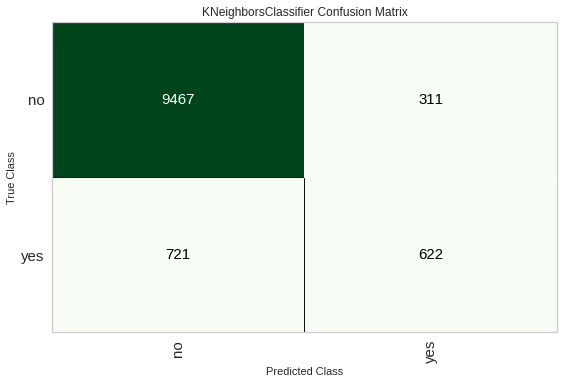

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

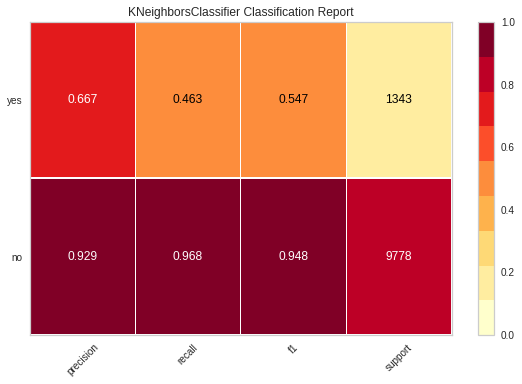

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'class_report')

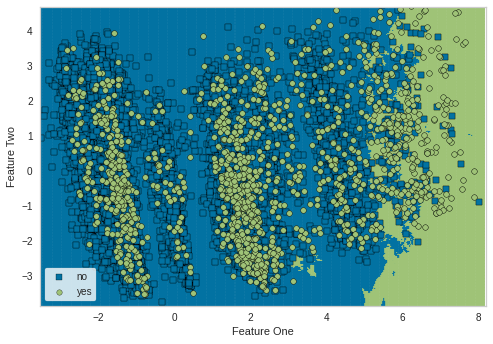

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot='boundary')

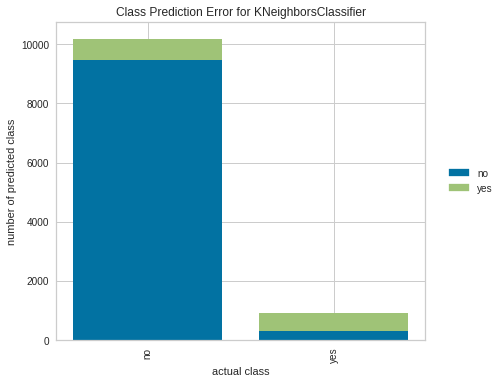

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_knn, plot = 'error')

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9072,0.9272,0.4631,0.6667,0.5466,0.4967,0.507


In [ ]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

In [ ]:
#Final K Nearest Neighbour parameters for deployment
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform')


In [ ]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.9198,0,0,0,0,0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Label,Score
0,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,1.0
1,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,1.0
2,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,1.0
3,39,housemaid,married,basic.4y,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,1.0
4,55,blue-collar,married,basic.4y,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no,1.0
